## Natutal Language Processing mid-term

A more innovative and advanced approach for 'fake-news' detection would better assist social media networks; with the technological resources necessary to identify truth and misinformation better. The notebook explored the dataset, 'Fake and real news' available from the Kaggle official website[1]. The natural-language processing mid-term aims to provide thorough research and analysis, supporting the solution to increasing fake-news identification through advanced text preprocessing, nested-cross validation and fine-tuned prediction modelling. In doing so, the project aims to provide sufficient evidence to support the effect of the multitude of technologies utilized to increase model prediction accuracy. 

In the 2022 digital economy, the globe is in the face of an epidemic, not only the COVID-19 virus but social media networks, spreading 'virus-like' fake news. The globally interconnected data economy and the ability to share, access, and create information have caused unprecedented and unimaginable ways to connect with friends, family, and people across the globe. Allowing users to gain insight into cultures, find people of like-minded interest and access information in a few presses of buttons, an unbelievable breakthrough unforeseen to most people twenty years ago. At the same time, social media networks have allowed incredible innovations in connecting and sharing information with friends and loved ones. In this new innovative digital and interconnected world, the ability for users to access and create information has inadvertently enabled nefarious content creators to spread rumours, lies, and misinformation - misleading users that the data is valid. 

According to GlobalWebIndex, Hootsuite, DataReportal, the average internet user spends 145 minutes on social media each day globally [2]. Putting the statistic in scope equates roughly 2.4 hours per day and 882 hours per year.


![time](img/time.png)


Also reported, 35% of social media users worldwide use social media to read news stories [3]. Furthermore, the statistic does not remove 65% of users from the current 'fake-news' epidemic; internet social media content consumers are unwillingly exposed to misinformation.


![usage](img/usuage.png)


Statista reports, in 2022, the estimated number of social media users is 3.92 billion and is forecasted to reach 4.41 billion by the year 2025 [4]. 


![users](img/users.png)


On January 6th, 2021, precisely one-year ago from this writing, an insurrection of Capitol hill took place [5]. Where misled and misinformed protestors aimed to overthrow and destroy American democracy. Social media and false statements of the former president fueled protestors with the misbelief of voter fraud & rigged voting machines, which led to an invalid election. The residual result of The Insurrection on Capitol hill caused the death of five individuals and widespread distrust of American democracy, all unnecessary and fueled by lies. This example brings awareness and possible consequences of misinformation news on social media and its effects in real-life. While some of the impacts are easily seen and understood, the long-term implications of January 6th, 2021's Capitol Insurrection have not occurred. 

Although the Capitol Insurrection is not an isolated incident, recent innovations in natural language processing and machine learning show promising breakthroughs in creating a more well-informed internet audience to assist better and ensure news and information integrity. The long-term and social-economic effects of widespread misinformation are not predictable. My goal for the mid-term is to demonstrate the impact of minor & feasible adjustments to data preprocessing and model fitting to develop a more accurate and precise identification of news validation. In doing this, the project aims to provide evidence through research and analysis to support the possible impact of natural language processing and protecting the integrity of news information. 

## BASELINE

![baseline](img/baseline.png)

The baseline for the project is a barebone 'fake-news' classifier with 76% prediction accuracy. The model uses basic text-preprocessing converting lowercase to all capital letters, bag-of-words and tokenization. The development of the barebone model took a few hours, and the prediction model utilized a multinomial Naive Bayes classification model. The summary of the results is in the confusion matrix above. 

## Solution

The project solution implements new and innovates prior technologies operated on the baseline model; in doing so, it provides higher model prediction accuracy and precision through the implementation of advanced text preprocessing, nested-cross validation and fine-tuned prediction modelling. 

Advanced text preprocessing: Remove and hyperlink unwanted characters, punctuations, and stop words—advanced tokenization to group words and phrases better.

Nested Cross-Validation: Nested cross-validation implemented to ensure model accuracy and prediction results across the different train and test data folds, to prove the withhold the research results integrity. 

Model tuning: adjustments made to the prediction model to more accurately predict 'real' or 'fake' values of the news dataset. 

## LIBRARIES

In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
import re
import string
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
import itertools

## DATASET INFORMATION

The dataset: 'Fake and real news' is available from the Kaggle official website[1]

The dataset download contained two CSV files. One file contains real news, and the other has fake news. Each CSV contains similar columns and rows of data; the combined size of the dataset is 44,898 entries. The size of the dataset is 116.4MB. The dataset includes the columns listed below:

1. Title: The title of the news article
2. Text: the text in the news article
3. Subject: News, Politics, WorldNews, PoliticNews, Left-News, US-News, Government News, Middle east
4. Date: date of publishing
5. Target: True or Fake

The initial column values were all originally Dtype objects. 


Adjustment to the dataset before text preprocessing:
1. The first step created two data frames of the separate CSV files. 
2. Merged both data frames into a singular data frame
3. Shuffled the combined dataset to prevent bias
4. Dropped all empty values
5. Converted true and fake to sting values of 1 and 0
6. A created smaller copy of a dataset to shorten the time of text-processing 

Additional information on dataset and visualisation listed below.

## UNDERSTANDING THE DATA

In [2]:
#Create Dataframe for both CSV Dataset Files
fakedf = pd.read_csv('Dataset/Fake.csv')
truedf = pd.read_csv('Dataset/True.csv')
#Create target for fake and real news
fakedf['target'] = 'fake'
truedf['target'] = 'true'
#Merge both Dataframes into Single Dataset Containing both real and fake news 
NewsData = pd.concat([fakedf, truedf]).reset_index(drop = True)
#Mix the data, to prevent overfitting and dataset memorization 
NewsData = shuffle(NewsData)
NewsData = NewsData.reset_index(drop=True)

In [3]:
NewsData.head()

,title,text,subject,date,target
0,U.N.'s de Mistura: Next Syria peace talks in G...,MOSCOW (Reuters) - U.N. special envoy on Syria...,worldnews,"December 21, 2017",true
1,Russia says satellite launch failure due to pr...,MOSCOW (Reuters) - Russian Deputy Prime Minist...,worldnews,"December 27, 2017",true
2,"German police arrest Syrian suspect, avert 'ma...",BERLIN (Reuters) - German police arrested a 19...,worldnews,"October 31, 2017",true
3,Trump to pitch 'America First' agenda in U.N. ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"September 14, 2017",true
4,French court demands 40 million euro bail for ...,"MARSEILLE, France (Reuters) - A French judge h...",worldnews,"December 6, 2017",true


In [4]:
NewsData.describe()

,title,text,subject,date,target
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",fake
freq,14,627,11272,182,23481


In [5]:
NewsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [6]:
for key,value in NewsData.items():
    print(key,'\n',value,'\n')

title 
 0        U.N.'s de Mistura: Next Syria peace talks in G...
1        Russia says satellite launch failure due to pr...
2        German police arrest Syrian suspect, avert 'ma...
3        Trump to pitch 'America First' agenda in U.N. ...
4        French court demands 40 million euro bail for ...
                               ...                        
44893     Two Major Breaking Allegations Against Michae...
44894     Top GOP Adviser Admits Hillary Clinton Would ...
44895    Death toll from fighting in South Sudan's Grea...
44896    U.S. extends overtime pay to 4.2 million salar...
44897    OBAMA’S FUNDAMENTAL TRANSFORMATION: Census Rec...
Name: title, Length: 44898, dtype: object 

text 
 0        MOSCOW (Reuters) - U.N. special envoy on Syria...
1        MOSCOW (Reuters) - Russian Deputy Prime Minist...
2        BERLIN (Reuters) - German police arrested a 19...
3        WASHINGTON (Reuters) - President Donald Trump ...
4        MARSEILLE, France (Reuters) - A French judge h.

## DATA VISUALIZATION 

<AxesSubplot:xlabel='target', ylabel='count'>

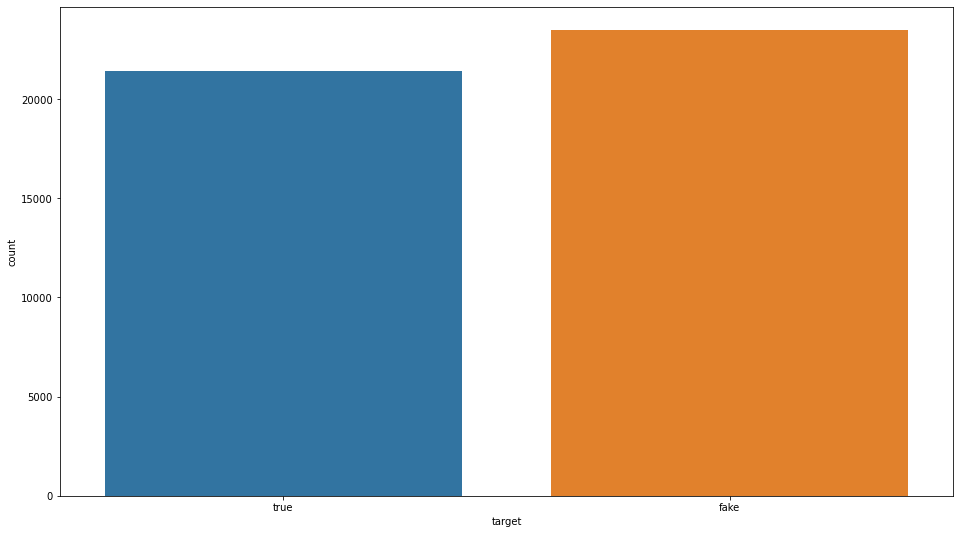

In [7]:
plt.figure(figsize = (16, 9))
sns.countplot(x = 'target', data =NewsData)

<AxesSubplot:xlabel='subject', ylabel='count'>

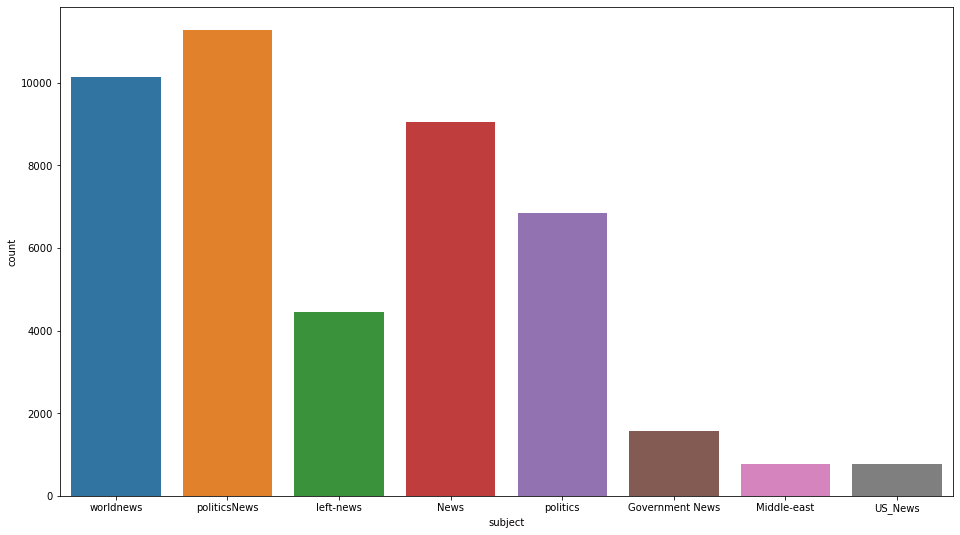

In [8]:
plt.figure(figsize = (16, 9))
sns.countplot(x = 'subject', data =NewsData)

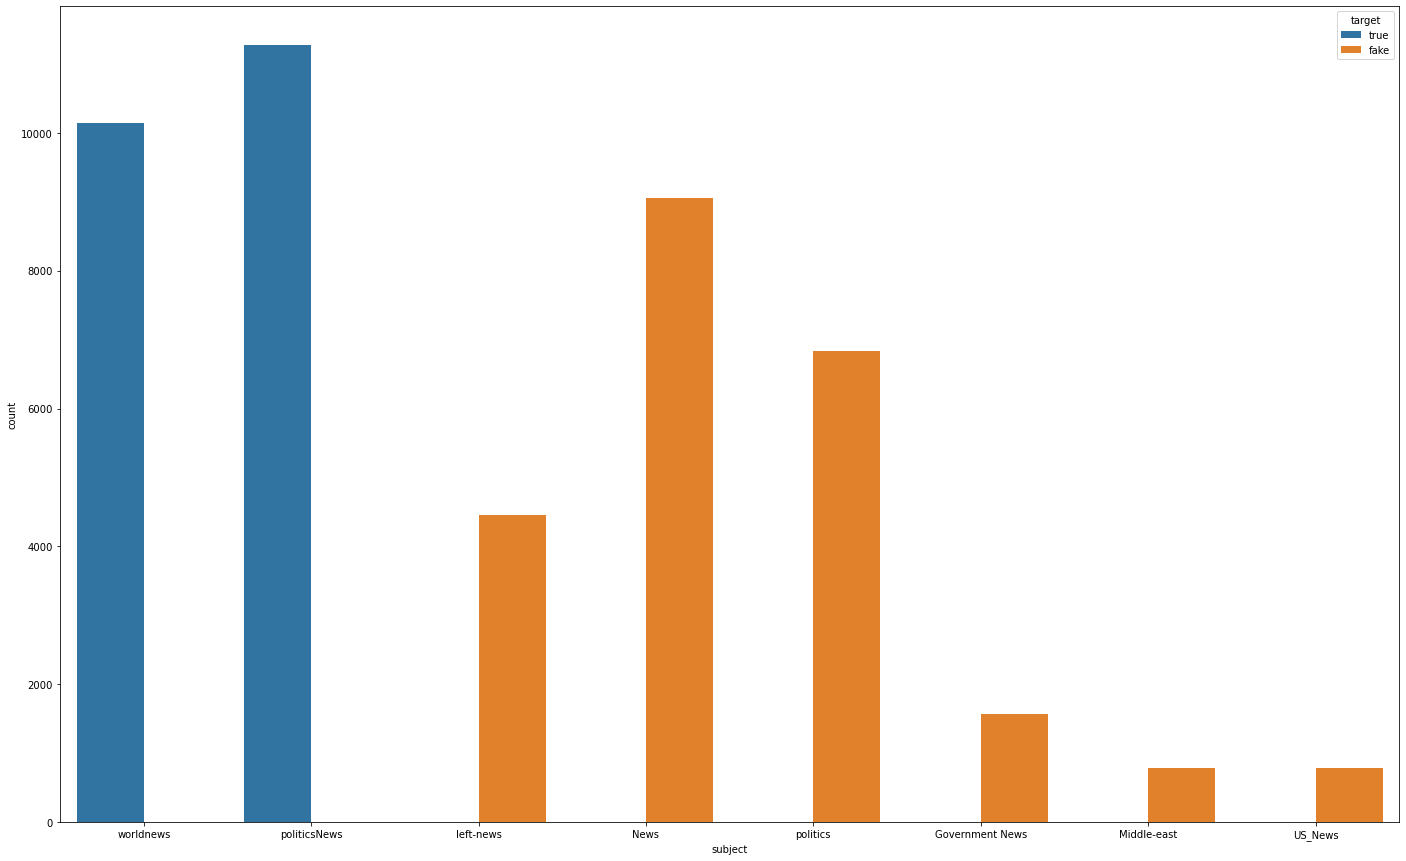

In [9]:
plt.figure(figsize = (24, 15))
ax = sns.countplot(x = 'subject', hue = "target", data = NewsData)

## DATA PREP AND CLEANING

In [10]:
#Drop Null Values
NewsData = NewsData.dropna()
#Convert True and False Values
NewsData.target = NewsData.target.astype(str)
NewsData.target = NewsData.target.str.strip()
dict = { 'true' : '1' , 'fake' : '0'}
NewsData['target'] = NewsData['target'].map(dict)

In [11]:
#Adjust columns in Newsdata
NewsData['news']=NewsData['title']+NewsData['text']
NewsData=NewsData.drop(['title', 'text'], axis=1)
NewsData['date'].value_counts()
#Make Dataset Smaller for Run time
NewsData_S  = NewsData[:90]
#Place independent features in X variable 
X = NewsData_S.drop('target',axis =1)
#Place Values for True or False in Y-Value 
y = NewsData_S['target']
#Creating a copy 
NewsData_Adjusted = NewsData_S.copy()

## TOKENIZATION AND TEXT PREPROCESSING

Advanced text preprocessing: Remove and hyperlink unwanted characters, punctuations, and stop words—advanced tokenization to group words and phrases better.

In [12]:
port_S = PorterStemmer()
array_= []

for i in range(0, len(NewsData_Adjusted)):
      text_adj = re.sub('[^a-zA-Z]', ' ', NewsData_Adjusted['news'][i])
      text_adj = re.sub('https?://\S+|www\.\S+', '', NewsData_Adjusted['news'][i])
      text_adj = re.sub('<.*?>+', '', NewsData_Adjusted['news'][i])
      text_adj = re.sub('[%s]' % re.escape(string.punctuation), '', NewsData_Adjusted['news'][i])
      text_adj = re.sub('\n', '', NewsData_Adjusted['news'][i])
      text_adj = re.sub('\w*\d\w*', '', NewsData_Adjusted['news'][i])
      text_adj = text_adj.lower()
      text_adj = text_adj.split()
      text_adj = [port_S.stem(word) for word in text_adj if not word in stopwords.words('english')]
      text_adj = ' '.join(text_adj)
      array_.append(text_adj)
       

## BAG OF WORDS MODEL AND COUNT VECTORS 

In [13]:
cv = CountVectorizer(max_features = 5000,ngram_range=(1,3))
X = cv.fit_transform(array_).toarray()
X.shape 
y =NewsData_Adjusted['target']

## NLP ML MODEL 

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 0)

In [15]:
count_df = pd.DataFrame(X_train,columns = cv.get_feature_names())

Acc: 94.44 %


<AxesSubplot:>

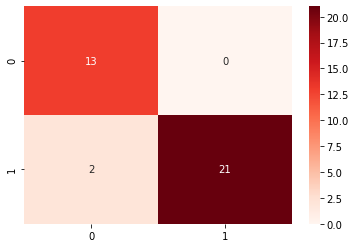

In [16]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)

# Evaluation of Results
acc_score = metrics.accuracy_score(y_test,pred)
percent_conv = acc_score * 100
print("Acc: %0.2f"%percent_conv,"%")
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True, cmap='Reds')

## CONCLUSION

From the data in the notebook listed above, evidence supports applications of natural language processing to identify false, untrue misinformation. The implementation of advanced-text processing & fine-tune model prediction can significantly increase the model's accuracy. The initial baseline model predicted roughly 76%, with adjustments made in my project, the model accuracy ranged between 90% - 97%. A significant increase in accuracy would impact 20% of the data misidentified in the baseline model. The solution can be translated across any text classification domain where the result is either 0 or 1. Others can easily curate the project to their dataset, a few changes to the data preparation and processing section, and the code is helpful for other datasets with text classification values of 0 and 1. 


## REFERENCES 
1. [1] Bisaillon, C. (n.d.). Fake and Real News Dataset. Retrieved January 7, 2022, from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset. 
2. [2] We Are Social, & DataReportal, & Hootsuite. (January 27, 2021). Daily time spent on social networking by internet users worldwide from 2012 to 2020 (in minutes) [Graph]. In Statista. Retrieved January 07, 2022, from https://www.statista.com/statistics/433871/daily-social-media-usage-worldwide/
3. [3] GlobalWebIndex, & We Are Social, & GlobalWebIndex, & We Are Social, & Hootsuite, & DataReportal. (October 21, 2021). Most popular reasons for internet users worldwide to use social media as of 2nd quarter 2021 [Graph]. In Statista. Retrieved January 07, 2022, from https://www.statista.com/statistics/715449/social-media-usage-reasons-worldwide/
4. [4] Statista. (July 15, 2020). Number of social network users worldwide from 2017 to 2025 (in billions) [Graph]. In Statista. Retrieved January 07, 2022, from https://www.statista.com/statistics/278414/number-of-worldwide-social-network-users/
5. [5] Dale, D., &amp; Cohen, M. (2022, January 5). Fact check: Five enduring lies about the capitol insurrection. CNN. Retrieved January 7, 2022, from https://www.cnn.com/2022/01/04/politics/fact-check-capitol-insurrection-january-6-lies/index.html 